<a href="https://colab.research.google.com/github/Minsoo1036/Applied-Data-Analysis-Study/blob/main/SARIMA_tutorial_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/rawdata/corn_raw_data.csv")
df2 = pd.read_excel("/content/drive/MyDrive/rawdata/20230627_TFT_SM_df.xlsx")

# ARIMA 실습 ( 옥수수 )

In [ ]:
df1.head()

,date,data,d11,d15,d13,d14,d3,d17,d4
0,2007-07-09,359.30,0.1898,102.2642,1.830,664.90,283998.960,5.104,1081345.971
1,2007-07-16,339.50,0.2202,102.2608,1.781,673.74,137032.560,5.030,951318.252
2,2007-07-23,329.80,0.2506,102.2574,1.878,672.60,248509.296,4.884,965517.411
3,2007-07-30,339.90,0.2810,102.2540,1.858,666.34,321965.280,4.768,667944.696
4,2007-08-06,350.45,0.6440,102.2330,1.814,681.26,135181.872,4.786,1138447.419


In [ ]:
df2.head()

,Unnamed: 0,date,data,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13
0,0,2009-01-01,596.25,70.0,10508.474576,945.379153,65.68,4898.945763,56737.376949,126004.491525,26960.726271,44.123158,220221,45.3,626.121186,581.491695
1,1,2009-02-01,695.00,62.5,9491.525424,853.890847,80.79,4424.854237,51246.663051,113810.508475,24351.623729,43.091500,215510,49.0,565.528814,525.218305
2,2,2009-03-01,808.00,25.0,21730.000000,2531.790000,109.54,9317.600000,92839.570000,248214.460000,61775.040000,45.580909,216793,52.4,1339.280000,1150.250000
3,3,2009-04-01,971.25,35.0,20760.000000,2782.700000,115.68,9343.200000,77543.870000,240968.610000,63167.120000,49.990000,212612,53.5,1380.770000,1322.070000
4,4,2009-05-01,873.75,48.0,31120.000000,2642.970000,110.69,10028.400000,78154.510000,287522.800000,70189.890000,57.891000,203202,53.1,1323.250000,1271.100000


# 1. 옥수수 가격 예측

In [ ]:
df1 = df1[['date','data']]

In [ ]:
df1 = df1.set_index("date")

<Axes: xlabel='date'>

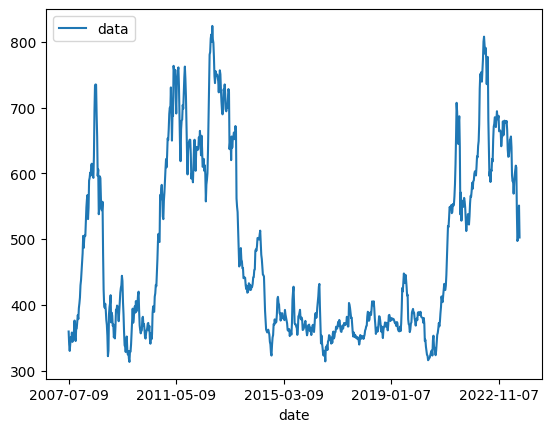

In [ ]:
df1.plot()

In [ ]:
df1.tail() #2023년 7월 한달간 주간 옥수수 가격 예측

,data
date,
2023-07-03,497.00
2023-07-10,499.80
2023-07-17,535.20
2023-07-24,550.85
2023-07-31,502.30


In [ ]:
nontest_df = df1.head(839-5)

In [ ]:
nontest_df.tail()

,data
date,
2023-05-29,597.375
2023-06-05,604.850
2023-06-12,611.650
2023-06-19,608.750
2023-06-26,541.850


<Axes: xlabel='date'>

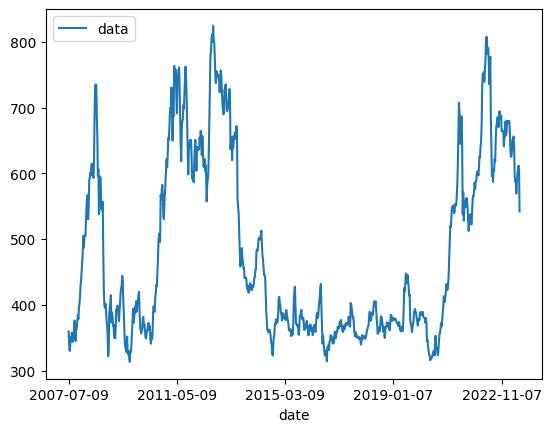

In [ ]:
nontest_df.plot()

In [ ]:
import numpy as np
nontest_df['data'] = np.log(nontest_df['data'])

<ipython-input-16-c58c9ca35421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nontest_df['data'] = np.log(nontest_df['data'])


<Axes: xlabel='date'>

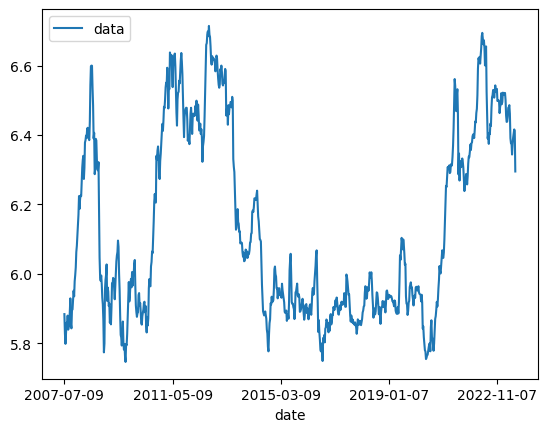

In [ ]:
nontest_df.plot()

In [ ]:
nontest_df['data'] = nontest_df['data'].diff(1)

<ipython-input-18-cce452e28acc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nontest_df['data'] = nontest_df['data'].diff(1)


<Axes: xlabel='date'>

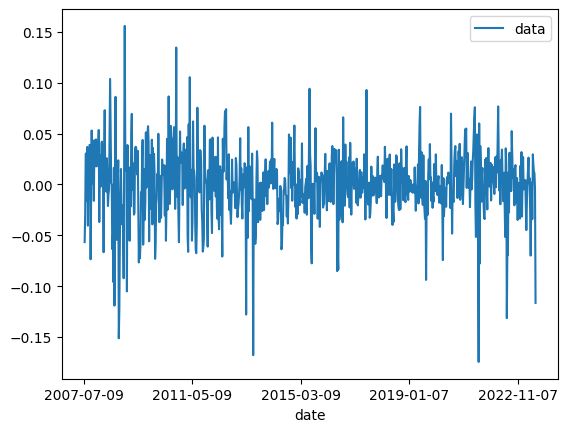

In [ ]:
nontest_df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

In [ ]:
nontest_df = nontest_df.dropna()

In [ ]:
column_name = 'data'
adf_result = adfuller(nontest_df[column_name])

# Round up the p-value to 2 decimal places
rounded_p_value = round(adf_result[1], 2)

print(f'ADF Statistic for {column_name}: {adf_result[0]}')
print(f'p-value for {column_name}: {rounded_p_value}')
print(f'Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

# p_value < 0.05 -> reject null hypothesis -> data is stationary

ADF Statistic for data: -23.100080315813226
p-value for data: 0.0
Critical Values:
	1%: -3.4382341228740345
	5%: -2.865020104308721
	10%: -2.568623096396542


In [ ]:
nontest_df = df1.head(839-5)
nontest_df['data'] = np.log(nontest_df['data'])
nontest_df.head()

<ipython-input-23-fd462b7fd734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nontest_df['data'] = np.log(nontest_df['data'])


,data
date,
2007-07-09,5.884158
2007-07-16,5.827474
2007-07-23,5.798486
2007-07-30,5.828651
2007-08-06,5.859218


In [ ]:
mdl = SARIMAX(endog=nontest_df['data'],order=(2,1,0)) #ARIMA(2,1,0)
res = mdl.fit(maxiter=200)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   data   No. Observations:                  834
Model:               SARIMAX(2, 1, 0)   Log Likelihood                1657.404
Date:                Thu, 16 Nov 2023   AIC                          -3308.807
Time:                        09:07:09   BIC                          -3294.632
Sample:                    07-09-2007   HQIC                         -3303.372
                         - 06-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2131      0.027      7.953      0.000       0.161       0.266
ar.L2         -0.0097      0.027     -0.363      0.717      -0.062       0.043
sigma2         0.0011   3.37e-05     32.478      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               410.55
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

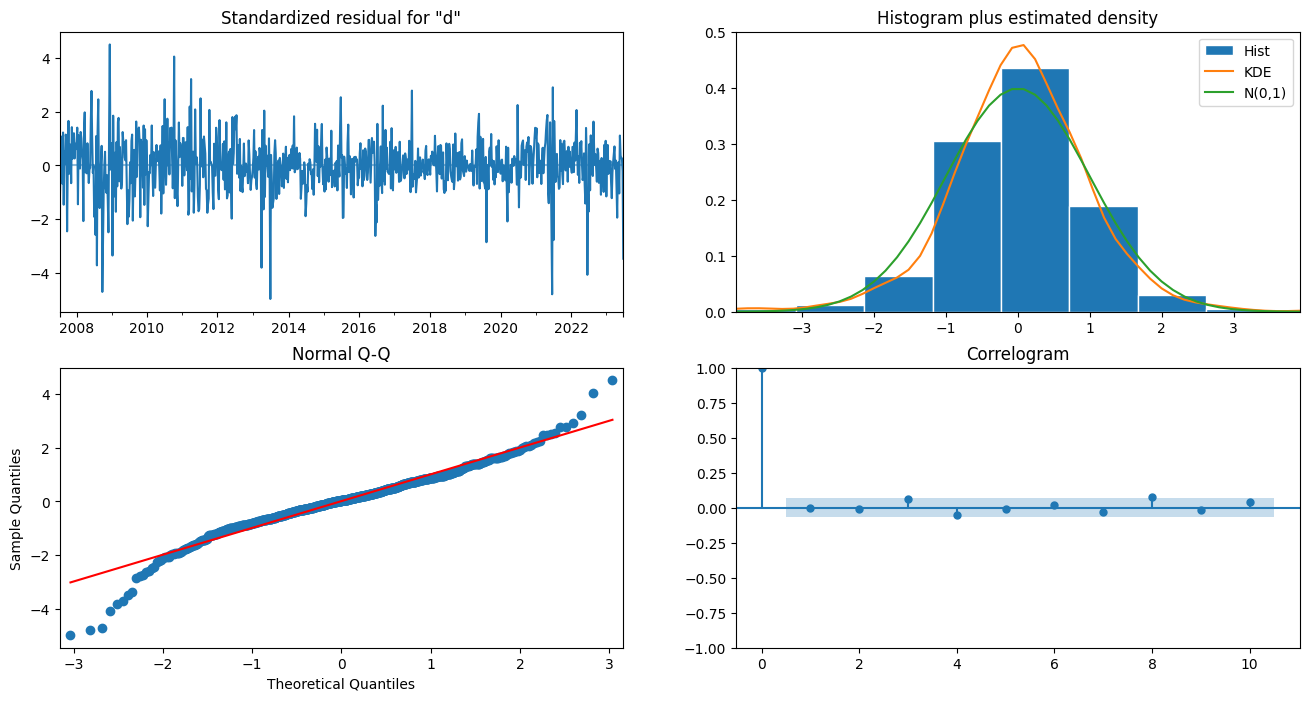

In [ ]:
from matplotlib import pyplot as plt
res.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
import statsmodels.api as sm

sm.stats.acorr_ljungbox(np.array(res.resid), lags=[10], return_df = True)

,lb_stat,lb_pvalue
10,0.323525,0.999999


In [ ]:
pred = res.get_prediction(start=834,end=838,dynamic=True)
pred.predicted_mean

2023-07-03    6.270222
2023-07-10    6.266077
2023-07-17    6.265435
2023-07-24    6.265338
2023-07-31    6.265324
Freq: W-MON, Name: predicted_mean, dtype: float64

In [ ]:
y_pred = np.exp(np.array(pred.predicted_mean))

In [ ]:
y_real = np.array(df1.tail(5)).reshape(-1,)

In [ ]:
y_pred

array([528.59483272, 526.40820947, 526.07017406, 526.01938432,
       526.01184966])

In [ ]:
y_real

array([497.  , 499.8 , 535.2 , 550.85, 502.3 ])

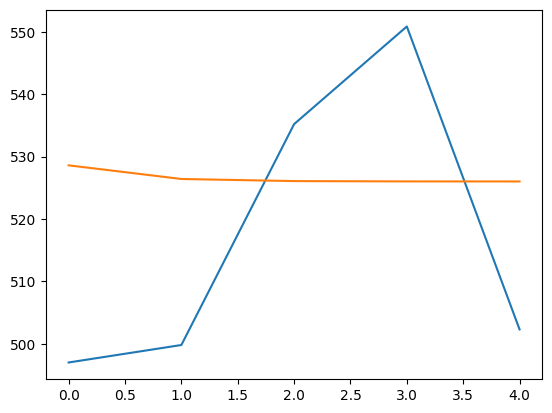

In [ ]:
plt.plot(y_real)
plt.plot(y_pred)

In [ ]:
np.mean(abs(y_pred - y_real) / y_real) #MAPE : 4.5%

0.04523019660207829

In [ ]:
nontest_df['data_diff'] = nontest_df['data'].diff(1)

<ipython-input-35-b78d8111c187>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nontest_df['data_diff'] = nontest_df['data'].diff(1)


In [ ]:
nontest_df.head()

,data,data_diff
date,,
2007-07-09,5.884158,NaN
2007-07-16,5.827474,-0.056684
2007-07-23,5.798486,-0.028988
2007-07-30,5.828651,0.030165
2007-08-06,5.859218,0.030567


In [ ]:
nontest_df =nontest_df.dropna()

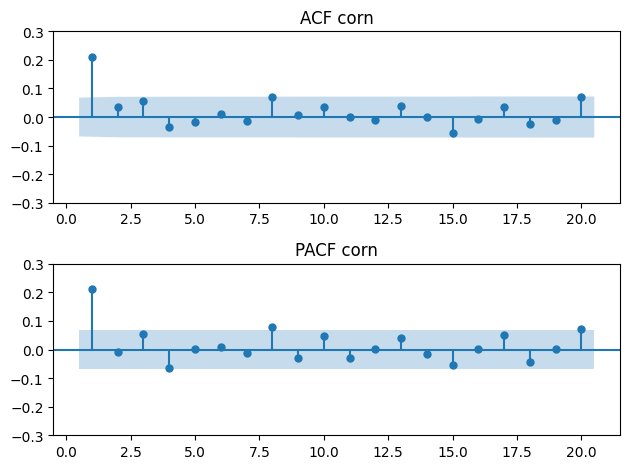

In [ ]:
# p,d,q 찾기

import statsmodels.graphics.tsaplots as sgt

## Close
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(nontest_df['data_diff'], lags = 20, zero = False, ax=ax1)
ax1.set_title("ACF corn")
ax1.set_ylim(-0.3,0.3)


sgt.plot_pacf(nontest_df['data_diff'], lags = 20, zero = False, method = ('ols'), ax=ax2)
ax2.set_title("PACF corn")
ax2.set_ylim(-0.3,0.3)

plt.tight_layout()
plt.show()

In [ ]:
mdl = SARIMAX(endog=nontest_df['data'],order=(1,1,0)) #-3308.086
res = mdl.fit(maxiter=200)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   data   No. Observations:                  833
Model:               SARIMAX(1, 1, 0)   Log Likelihood                1656.043
Date:                Thu, 16 Nov 2023   AIC                          -3308.086
Time:                        09:07:12   BIC                          -3298.639
Sample:                    07-16-2007   HQIC                         -3304.464
                         - 06-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2111      0.027      7.952      0.000       0.159       0.263
sigma2         0.0011   3.29e-05     33.193      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               420.08
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mdl = SARIMAX(endog=nontest_df['data'],order=(0,1,1)) #-3308.046
res = mdl.fit(maxiter=200)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   data   No. Observations:                  833
Model:               SARIMAX(0, 1, 1)   Log Likelihood                1656.023
Date:                Thu, 16 Nov 2023   AIC                          -3308.046
Time:                        09:07:12   BIC                          -3298.598
Sample:                    07-16-2007   HQIC                         -3304.423
                         - 06-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2133      0.026      8.278      0.000       0.163       0.264
sigma2         0.0011   3.34e-05     32.701      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               402.12
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mdl = SARIMAX(endog=nontest_df['data'],order=(1,1,1)) #-3306.170
res = mdl.fit(maxiter=200)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   data   No. Observations:                  833
Model:               SARIMAX(1, 1, 1)   Log Likelihood                1656.085
Date:                Thu, 16 Nov 2023   AIC                          -3306.170
Time:                        09:07:12   BIC                          -3291.998
Sample:                    07-16-2007   HQIC                         -3300.736
                         - 06-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1717      0.128      1.346      0.178      -0.078       0.422
ma.L1          0.0416      0.127      0.327      0.744      -0.208       0.291
sigma2         0.0011   3.36e-05     32.488      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               415.70
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mdl = SARIMAX(endog=nontest_df['data'],order=(2,1,0)) #-3306.134
res = mdl.fit(maxiter=200)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   data   No. Observations:                  833
Model:               SARIMAX(2, 1, 0)   Log Likelihood                1656.067
Date:                Thu, 16 Nov 2023   AIC                          -3306.134
Time:                        09:07:13   BIC                          -3291.962
Sample:                    07-16-2007   HQIC                         -3300.700
                         - 06-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2138      0.027      7.990      0.000       0.161       0.266
ar.L2         -0.0077      0.027     -0.287      0.774      -0.060       0.045
sigma2         0.0011   3.36e-05     32.502      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               415.95
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mdl = SARIMAX(endog=nontest_df['data'],order=(0,1,2)) #	-3306.089
res = mdl.fit(maxiter=200)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   data   No. Observations:                  833
Model:               SARIMAX(0, 1, 2)   Log Likelihood                1656.045
Date:                Thu, 16 Nov 2023   AIC                          -3306.089
Time:                        09:07:13   BIC                          -3291.918
Sample:                    07-16-2007   HQIC                         -3300.656
                         - 06-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2147      0.027      8.032      0.000       0.162       0.267
ma.L2          0.0074      0.028      0.266      0.790      -0.047       0.062
sigma2         0.0011   3.36e-05     32.533      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               403.89
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#최종모델

mdl = SARIMAX(endog=nontest_df['data'],order=(1,1,0)) #-3308.086
res = mdl.fit(maxiter=200)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   data   No. Observations:                  833
Model:               SARIMAX(1, 1, 0)   Log Likelihood                1656.043
Date:                Thu, 16 Nov 2023   AIC                          -3308.086
Time:                        09:07:13   BIC                          -3298.639
Sample:                    07-16-2007   HQIC                         -3304.464
                         - 06-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2111      0.027      7.952      0.000       0.159       0.263
sigma2         0.0011   3.29e-05     33.193      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               420.08
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

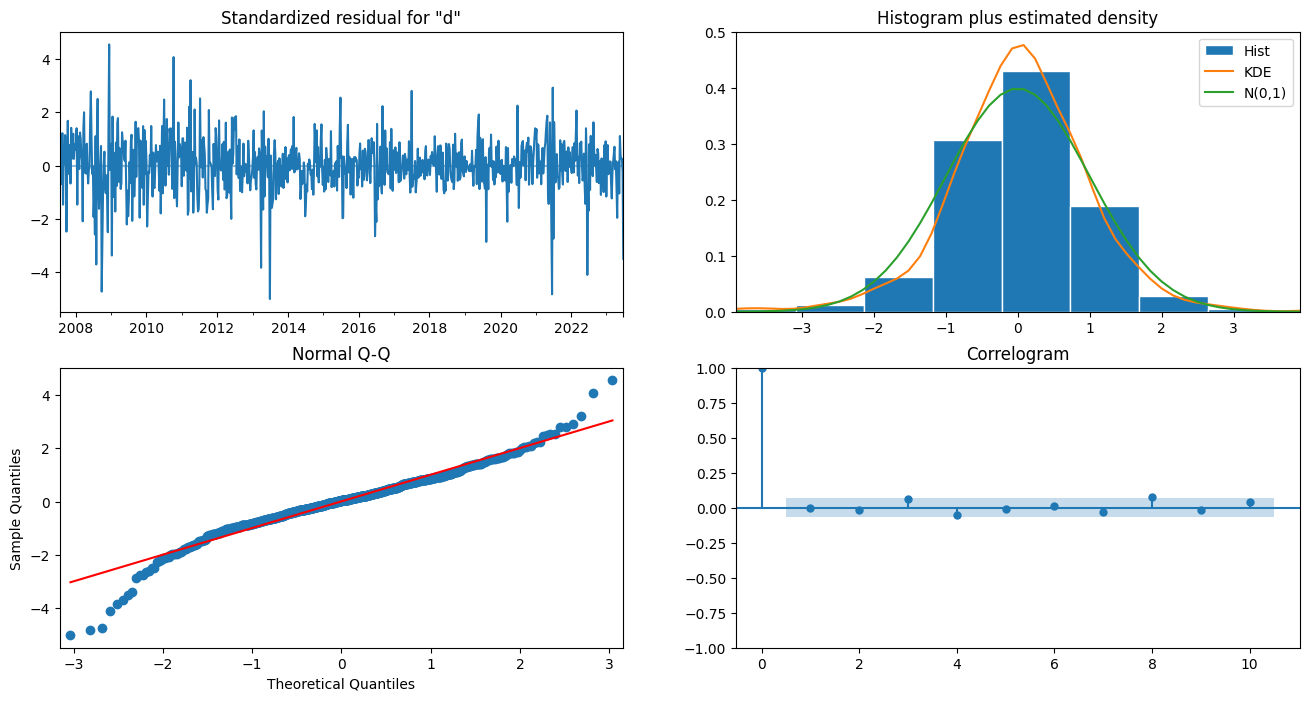

In [ ]:
from matplotlib import pyplot as plt
res.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = res.get_prediction(start=833,end=837,dynamic=True)
pred.predicted_mean

2023-07-03    6.270417
2023-07-10    6.265230
2023-07-17    6.264135
2023-07-24    6.263904
2023-07-31    6.263855
Freq: W-MON, Name: predicted_mean, dtype: float64

In [ ]:
y_pred = np.exp(np.array(pred.predicted_mean))

In [ ]:
y_pred

array([528.69759826, 525.96257153, 525.38709686, 525.26571121,
       525.24009377])

In [ ]:
y_real

array([497.  , 499.8 , 535.2 , 550.85, 502.3 ])

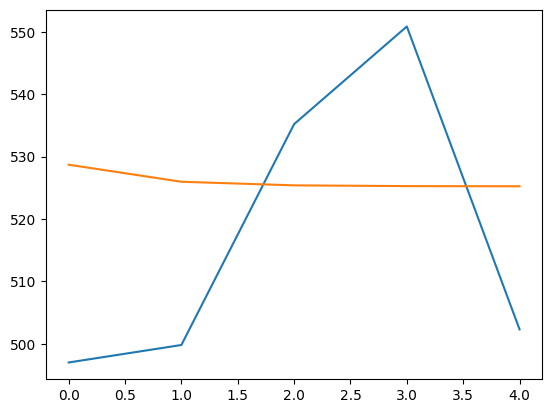

In [ ]:
plt.plot(y_real)
plt.plot(y_pred)

In [ ]:
np.mean(abs(y_pred - y_real) / y_real) #4.5%

0.04531483619170347

In [ ]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00


In [ ]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray,
                              start_p=1,
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [ ]:
arima_model = arimamodel(nontest_df['data_diff'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3306.951, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3273.037, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3308.821, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3308.899, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3274.860, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3306.933, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-3304.911, Time=0.88 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3310.792, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3308.856, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3308.831, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3310.731, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3306.808, Time=0.46 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 4.211 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:               SARIMAX(0, 0, 1)   Log Likelihood                1657.396
Date:                Thu, 16 Nov 2023   AIC                          -3310.792
Time:                        09:07:27   BIC                          -3301.342
Sample:                    07-16-2007   HQIC                         -3307.169
                         - 06-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2143      0.026      8.317      0.000       0.164       0.265
sigma2         0.0011   3.35e-05     32.674      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               397.21
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMA 실습 (중국 자동차 생산량)

In [ ]:
df2['d4'] #중국 자동차 생산량

0       65.68
1       80.79
2      109.54
3      115.68
4      110.69
        ...  
168    159.36
169    203.22
170    258.39
171    213.25
172    233.26
Name: d4, Length: 173, dtype: float64

In [ ]:
car_df = df2[['date','d4']]

<Axes: xlabel='date'>

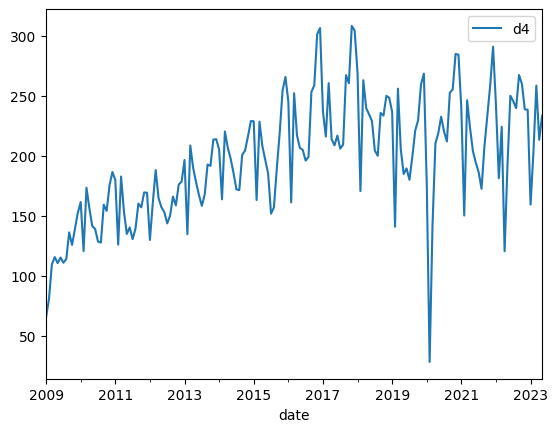

In [ ]:
car_df.set_index('date').plot()

In [ ]:
car_df.tail() #2023-01-01 ~ 2023-05-01 test

,date,d4
168,2023-01-01,159.36
169,2023-02-01,203.22
170,2023-03-01,258.39
171,2023-04-01,213.25
172,2023-05-01,233.26


In [ ]:
nontest_df = car_df.head(168) #2009.01 ~ 2022.12

<Axes: xlabel='date'>

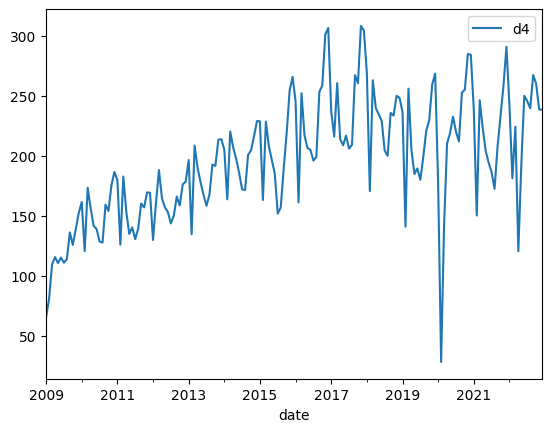

In [ ]:
nontest_df.set_index('date').plot()

In [ ]:
nontest_df = nontest_df.set_index('date')

In [ ]:
nontest_df['d4_log'] = np.log(nontest_df['d4']) #로그 변환

In [ ]:
nontest_df['d4_diff12'] = nontest_df['d4_log'].diff(12) #계절차분

<Axes: xlabel='date'>

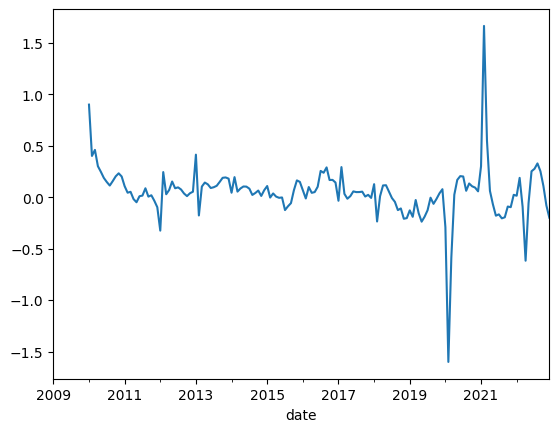

In [ ]:
nontest_df['d4_diff12'].plot()

In [ ]:
nontest_df['d4_diff12_diff1'] = nontest_df['d4_diff12'].diff(1) #계절차분 후 차분

<Axes: xlabel='date'>

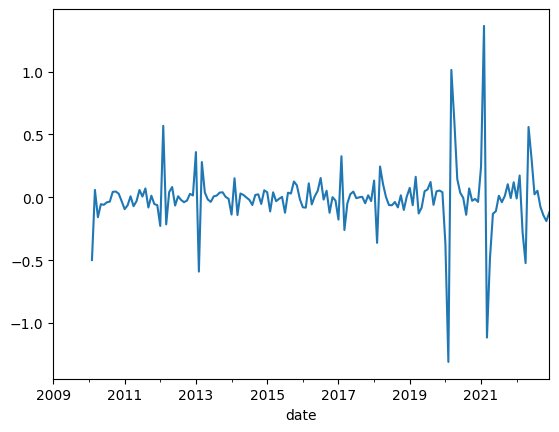

In [ ]:
nontest_df['d4_diff12_diff1'].plot()

In [ ]:
nontest_df = nontest_df.dropna()

In [ ]:
column_name = 'd4_diff12_diff1'
adf_result = adfuller(nontest_df[column_name])

# Round up the p-value to 2 decimal places
rounded_p_value = round(adf_result[1], 2)

print(f'ADF Statistic for {column_name}: {adf_result[0]}')
print(f'p-value for {column_name}: {rounded_p_value}')
print(f'Critical Values:')
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

# p_value < 0.05 -> reject null hypothesis -> data is stationary

ADF Statistic for d4_diff12_diff1: -5.079159281729779
p-value for d4_diff12_diff1: 0.0
Critical Values:
	1%: -3.4776006742422374
	5%: -2.882265832283648
	10%: -2.5778219289774156


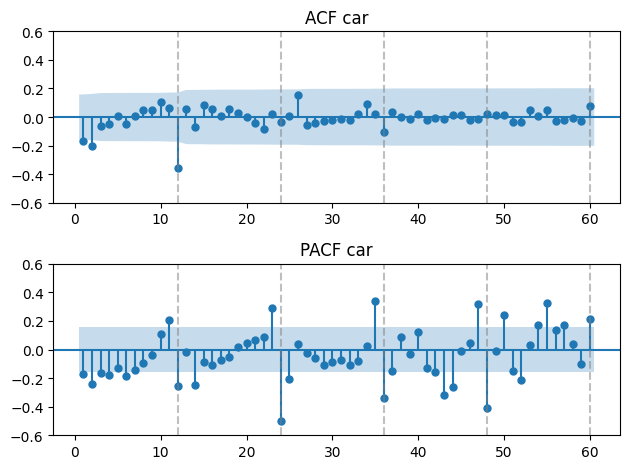

In [ ]:
# p,d,q 찾기

import statsmodels.graphics.tsaplots as sgt

## Close
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(nontest_df['d4_diff12_diff1'], lags = 60, zero = False, ax=ax1)
ax1.set_title("ACF car")
ax1.axvline(x=12, ls='--', c='grey', alpha=0.5)
ax1.axvline(x=24, ls='--', c='grey', alpha=0.5)
ax1.axvline(x=36, ls='--', c='grey', alpha=0.5)
ax1.axvline(x=48, ls='--', c='grey', alpha=0.5)
ax1.axvline(x=60, ls='--', c='grey', alpha=0.5)
ax1.set_ylim(-0.6,0.6)


sgt.plot_pacf(nontest_df['d4_diff12_diff1'], lags = 60, zero = False, method = ('ols'), ax=ax2)
ax2.set_title("PACF car")
ax2.axvline(x=12, ls='--', c='grey', alpha=0.5)
ax2.axvline(x=24, ls='--', c='grey', alpha=0.5)
ax2.axvline(x=36, ls='--', c='grey', alpha=0.5)
ax2.axvline(x=48, ls='--', c='grey', alpha=0.5)
ax2.axvline(x=60, ls='--', c='grey', alpha=0.5)
ax2.set_ylim(-0.6,0.6)

plt.tight_layout()
plt.show() # P, Q  = 0, 1 인거 같다.  p,q = 0, 2 인거 같다.

In [ ]:
mdl = SARIMAX(endog=nontest_df['d4_log'],order=(0,1,2), seasonal_order = (0,1,1,12)) # -62.004
res = mdl.fit(maxiter=200)
res.summary() #Prob(Q) = 0.85 이므로 잔차의 자기상관은 없다고 나옴. (플러스 요인, 가장 중요)
#Prob(JB) = 0.00 이므로 잔차의 정규성이 만족되지 않음. (마이너스 요인)
#Prob(H) = 0.00 이므로 잔차의 이분산성이 만족되지 않음. (마이너스 요인)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               d4_log   No. Observations:                  155
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                  35.002
Date:                              Thu, 16 Nov 2023   AIC                            -62.004
Time:                                      09:43:56   BIC                            -50.181
Sample:                                  02-01-2010   HQIC                           -57.200
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4543      0.056     -8.072      0.000      -0.565      -0.344
ma.L2         -0.4093      0.086     -4.772      0.000      -0.577      -0.241
ma.S.L12      -0.7600      0.042    -17.933      0.000      -0.843      -0.677
sigma2         0.0328      0.001     24.474      0.000       0.030       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             11333.23
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              11.33   Skew:                            -4.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

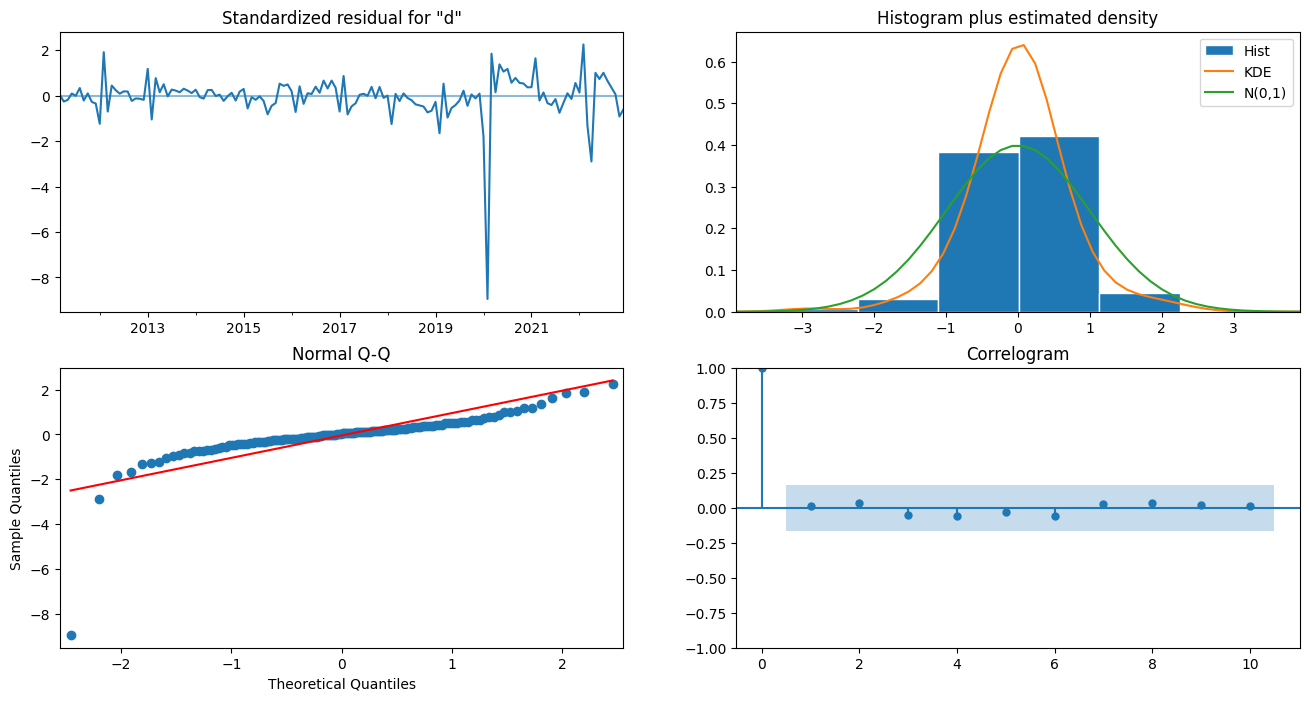

In [ ]:
from matplotlib import pyplot as plt
res.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
#trial 1
mdl = SARIMAX(endog=nontest_df['d4_log'],order=(0,1,3), seasonal_order = (0,1,1,12)) # -60.451
res = mdl.fit(maxiter=200)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               d4_log   No. Observations:                  155
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                  35.225
Date:                              Thu, 16 Nov 2023   AIC                            -60.451
Time:                                      09:48:06   BIC                            -45.672
Sample:                                  02-01-2010   HQIC                           -54.445
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4347      0.052     -8.363      0.000      -0.537      -0.333
ma.L2         -0.3784      0.104     -3.652      0.000      -0.581      -0.175
ma.L3         -0.0578      0.091     -0.634      0.526      -0.237       0.121
ma.S.L12      -0.7626      0.044    -17.373      0.000      -0.849      -0.677
sigma2         0.0327      0.001     23.729      0.000       0.030       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11609.09
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              11.40   Skew:                            -5.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#trial 2
mdl = SARIMAX(endog=nontest_df['d4_log'],order=(1,1,2), seasonal_order = (0,1,1,12)) # -60.462
res = mdl.fit(maxiter=200)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               d4_log   No. Observations:                  155
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                  35.231
Date:                              Thu, 16 Nov 2023   AIC                            -60.462
Time:                                      09:48:45   BIC                            -45.683
Sample:                                  02-01-2010   HQIC                           -54.457
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1419      0.232      0.612      0.540      -0.312       0.596
ma.L1         -0.5758      0.236     -2.436      0.015      -1.039      -0.113
ma.L2         -0.3145      0.198     -1.592      0.111      -0.702       0.073
ma.S.L12      -0.7624      0.044    -17.246      0.000      -0.849      -0.676
sigma2         0.0327      0.001     23.296      0.000       0.030       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11636.01
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              11.40   Skew:                            -5.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 최종 모델
mdl = SARIMAX(endog=nontest_df['d4_log'],order=(0,1,2), seasonal_order = (0,1,1,12)) # -62.004
res = mdl.fit(maxiter=200)
res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               d4_log   No. Observations:                  155
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                  35.002
Date:                              Thu, 16 Nov 2023   AIC                            -62.004
Time:                                      09:51:54   BIC                            -50.181
Sample:                                  02-01-2010   HQIC                           -57.200
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4543      0.056     -8.072      0.000      -0.565      -0.344
ma.L2         -0.4093      0.086     -4.772      0.000      -0.577      -0.241
ma.S.L12      -0.7600      0.042    -17.933      0.000      -0.843      -0.677
sigma2         0.0328      0.001     24.474      0.000       0.030       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             11333.23
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              11.33   Skew:                            -4.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred = res.get_prediction(start=155,end=159,dynamic=True)
pred.predicted_mean

2023-01-01    5.417350
2023-02-01    4.902860
2023-03-01    5.445258
2023-04-01    5.268030
2023-05-01    5.343319
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
nontest_df.tail(48)

,d4,d4_log,d4_diff12,d4_diff12_diff1
date,,,,
2019-01-01,236.52,5.466033,-0.128046,0.075126
2019-02-01,140.98,4.948618,-0.190528,-0.062481
2019-03-01,255.80,5.544396,-0.027188,0.163340
2019-04-01,205.20,5.323985,-0.155570,-0.128382
2019-05-01,184.83,5.219436,-0.237763,-0.082193
2019-06-01,189.45,5.244125,-0.189422,0.048341
2019-07-01,179.99,5.192901,-0.126590,0.062832
2019-08-01,199.06,5.293606,-0.004661,0.121929
2019-09-01,220.92,5.397801,-0.064420,-0.059759


In [ ]:
np.exp(pred.predicted_mean) #예측값

2023-01-01    225.281327
2023-02-01    134.674425
2023-03-01    231.656938
2023-04-01    194.033422
2023-05-01    209.205822
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
car_df.tail(5) #실제값

,date,d4
168,2023-01-01,159.36
169,2023-02-01,203.22
170,2023-03-01,258.39
171,2023-04-01,213.25
172,2023-05-01,233.26


In [ ]:
car_df['d4_pred'] = np.array([np.nan]*168 + list(np.array(np.exp(pred.predicted_mean))))

<ipython-input-130-eb4bd757a42f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['d4_pred'] = np.array([np.nan]*168 + list(np.array(np.exp(pred.predicted_mean))))


In [ ]:
car_df

,date,d4,d4_pred
0,2009-01-01,65.68,NaN
1,2009-02-01,80.79,NaN
2,2009-03-01,109.54,NaN
3,2009-04-01,115.68,NaN
4,2009-05-01,110.69,NaN
...,...,...,...
168,2023-01-01,159.36,225.281327
169,2023-02-01,203.22,134.674425
170,2023-03-01,258.39,231.656938
171,2023-04-01,213.25,194.033422


<Axes: xlabel='date'>

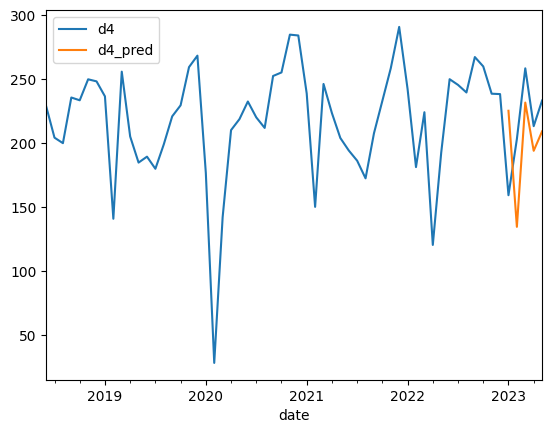

In [ ]:
car_df.set_index("date").tail(60).plot()

In [ ]:
pred.conf_int(alpha = 0.1) #90% 신뢰구간

,lower d4_log,upper d4_log
2023-01-01,5.119212,5.715488
2023-02-01,4.563227,5.242493
2023-03-01,5.103201,5.787314
2023-04-01,4.923567,5.612494
2023-05-01,4.996464,5.690173


In [ ]:
pred.conf_int(alpha = 0.2) #80% 신뢰구간

,lower d4_log,upper d4_log
2023-01-01,5.185063,5.649637
2023-02-01,4.638243,5.167478
2023-03-01,5.178751,5.711764
2023-04-01,4.999649,5.536412
2023-05-01,5.073075,5.613562


In [ ]:
car_df['d4_pred_lower80'] = np.array([np.nan]*168 + list(np.exp(np.array(pred.conf_int(alpha = 0.2).iloc[:,0]))))
car_df['d4_pred_upper80'] = np.array([np.nan]*168 + list(np.exp(np.array(pred.conf_int(alpha = 0.2).iloc[:,1]))))

<ipython-input-147-a6676ae71897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['d4_pred_lower80'] = np.array([np.nan]*168 + list(np.exp(np.array(pred.conf_int(alpha = 0.2).iloc[:,0]))))
<ipython-input-147-a6676ae71897>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['d4_pred_upper80'] = np.array([np.nan]*168 + list(np.exp(np.array(pred.conf_int(alpha = 0.2).iloc[:,1]))))


In [ ]:
car_df = car_df[['date','d4','d4_pred','d4_pred_lower80','d4_pred_upper80']]

<Axes: xlabel='date'>

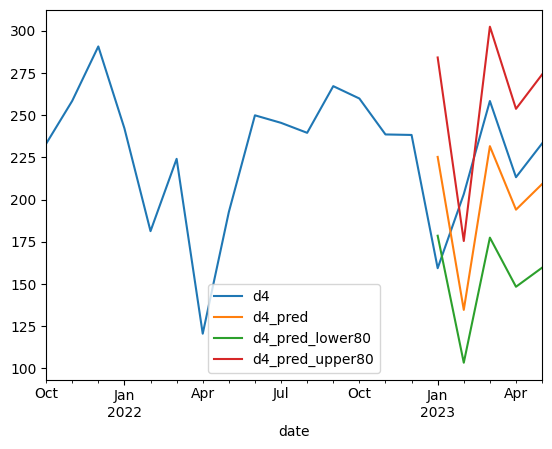

In [ ]:
car_df.set_index("date").tail(20).plot()